# Lab 01 - Regression

In [226]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
# %matplotlib widgets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [227]:
# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

## 1. Implement from scratch

### 1.1. Simple Linear Regression

In [228]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 1.3, 3.75, 2.25])
print("X:", X)
print("y:", y)

X: [[1]
 [2]
 [3]
 [4]
 [5]]
y: [1.   2.   1.3  3.75 2.25]


In [229]:
# TODO: Implement fit and predict methods


class SimpleLinearRegression:
    def __init__(self):
        self.coefficient = 0
        self.bias = 0

    def fit(self, X, y):
        self.coefficient = np.linalg.inv(X.T @ X) @ X.T @ y
        self.bias = y.mean() - self.coefficient * X.mean()

    def predict(self, X):
        return self.bias + X @ self.coefficient

In [230]:
# TODO: Predicting using SimpleLinearRegression

simple_regressor = SimpleLinearRegression()

In [231]:
simple_regressor.fit(X, y)

In [232]:
simple_regressor.coefficient, simple_regressor.bias

(array([0.63909091]), array([0.14272727]))

In [233]:
y_pred = simple_regressor.predict(X)
y_pred

array([0.78181818, 1.42090909, 2.06      , 2.69909091, 3.33818182])

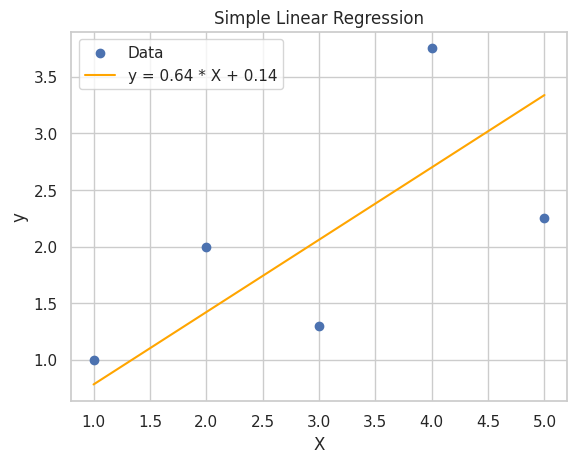

In [234]:
# TODO: Visualizing the results (scatter plot and regression line)
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(X, y, label="Data")
plt.plot(
    X,
    y_pred,
    color="orange",
    label=f"y = {simple_regressor.coefficient[0]:.2f} * X + {simple_regressor.bias[0]:.2f}",
)
plt.legend()

### 1.2 Multiple Linear Regression

In [235]:
X = np.array([[1, 1, 1], [1, 1, 2], [1, 2, 2], [1, 0, 1]])

Y = np.array([3.25, 6.5, 3.5, 5.0])
print("X:", X)
print("y:", Y)

X: [[1 1 1]
 [1 1 2]
 [1 2 2]
 [1 0 1]]
y: [3.25 6.5  3.5  5.  ]


In [236]:
# TODO: Implement fit and predict methods


class MultipleLinearRegression:
    def __init__(self):
        self.coef = 0
        self.bias = 0

    def fit(self, X, y):
        self.coef = np.linalg.inv(X.T @ X) @ X.T @ y
        self.bias = y.mean() - X.mean(axis=0) @ self.coef

    def predict(self, X):
        return X @ self.coef + self.bias

In [237]:
multi_regressor = MultipleLinearRegression()

In [238]:
multi_regressor.fit(X, Y)

In [239]:
# TODO: Predicting using MultipleLinearRegression
y_pred = multi_regressor.predict(X)
y_pred

array([2.9375, 6.1875, 3.8125, 5.3125])

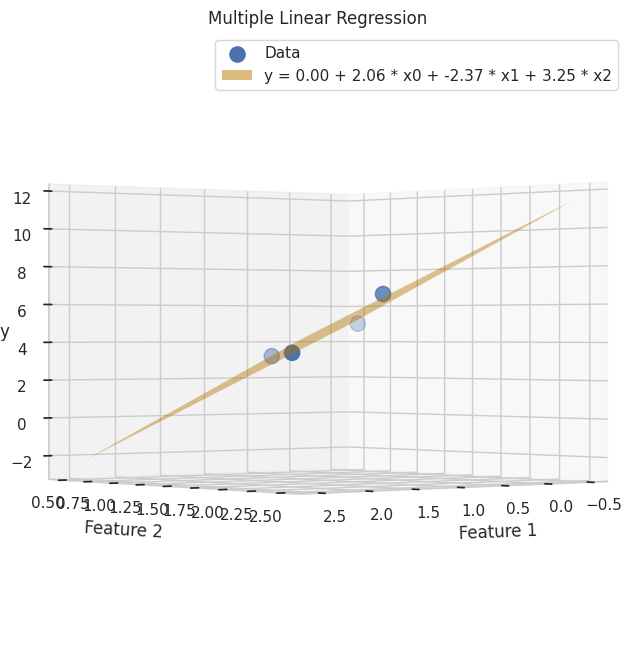

In [240]:
# TODO: VIsualizing the results (scatter plot and regression line)

X2 = X[:, 1:]

x1 = np.linspace(X2[:, 0].min() - 0.5, X2[:, 0].max() + 0.5, 30)
x2 = np.linspace(X2[:, 1].min() - 0.5, X2[:, 1].max() + 0.5, 30)
X1, X2_grid = np.meshgrid(x1, x2)

Y_plane = (
    multi_regressor.coef[0] * X[0].mean() # фиксируем из-за 4d -> 3d
    + multi_regressor.coef[1] * X1
    + multi_regressor.coef[2] * X2_grid
    + multi_regressor.bias
)

# График
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X2[:, 0], X2[:, 1], Y, s=120, label="Data")
# ax.scatter(X2[:, 0], X2[:, 1], y_pred, s=120, label="Predicted")
ax.plot_surface(
    X1,
    X2_grid,
    Y_plane,
    color="orange",
    alpha=0.5,
    linewidth=0,
    antialiased=True,
    label=f"y = {multi_regressor.bias:.2f} + {multi_regressor.coef[0]:.2f} * x0 + {multi_regressor.coef[1]:.2f} * x1 + {multi_regressor.coef[2]:.2f} * x2",
)

ax.set_xlabel("Feature 1", labelpad=10)
ax.set_ylabel("Feature 2", labelpad=10)
ax.set_zlabel("y")
ax.zaxis.labelpad = -2  # костыль из-за бага с zlabel
ax.set_title("Multiple Linear Regression")
ax.legend()
ax.view_init(elev=0, azim=50)

plt.show()

### 1.3 Gradient Descent

In [241]:
# TODO: Implement gradient descent algorithm
def gradient_descent(
    gradient_func,
    learning_rate,
    starting_point=0.0,
    max_iter=20,
    tolerance=1e-6,
):
    history = []
    result = starting_point
    for _ in range(max_iter):
        history.append(result)
        grad = gradient_func(result)
        if result - grad < tolerance:
            break
        result = result - learning_rate * grad

    return history, result

In [242]:
def func(x):
    return x**2 - 4 * x + 1


def grad_func(x):
    return 2 * x - 4

Optimized result: 1.976941569907863


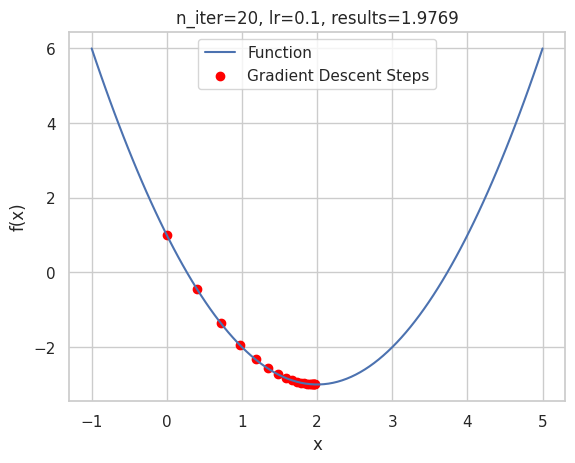

In [243]:
lr = 0.1

history, result = gradient_descent(
    starting_point=0.0,
    gradient_func=grad_func,
    learning_rate=lr,
    max_iter=20,
    tolerance=1e-6,
)
print("Optimized result:", result)

history_array = np.array(history)
x_vals = np.linspace(-1, 5, 100)
y_vals = func(x_vals)

plt.plot(x_vals, y_vals, label="Function")
plt.scatter(
    history_array, func(history_array), color="red", label="Gradient Descent Steps"
)
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(f"n_iter={len(history)}, lr={lr}, results={result:.4f}")

plt.show()

## 2. Using scikit-learn

### 2.1. Load dataset

- In this lab, we use dataset [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) (id=9).
- We want to predict Miles Per Gallon (MPG) - a measure of a vehicle's fuel efficiency. It shows how many miles a car can travel on one gallon of fuel. A higher MPG means a car is more fuel-efficient, travels further on less fuel, and can result in lower running costs.

In [244]:
try:
    from ucimlrepo import fetch_ucirepo
except ImportError:
    !pip install ucimlrepo
    from ucimlrepo import fetch_ucirepo

In [245]:
# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

In [246]:
auto_mpg.metadata

{'uci_id': 9,
 'name': 'Auto MPG',
 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg',
 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv',
 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption',
 'area': 'Other',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 398,
 'num_features': 7,
 'feature_types': ['Real', 'Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['mpg'],
 'index_col': ['car_name'],
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1993,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5859H',
 'creators': ['R. Quinlan'],
 'intro_paper': None,
 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had 

In [247]:
auto_mpg.variables

,name,role,type,demographic,description,units,missing_values
0,displacement,Feature,Continuous,None,None,None,no
1,mpg,Target,Continuous,None,None,None,no
2,cylinders,Feature,Integer,None,None,None,no
3,horsepower,Feature,Continuous,None,None,None,yes
4,weight,Feature,Continuous,None,None,None,no
5,acceleration,Feature,Continuous,None,None,None,no
6,model_year,Feature,Integer,None,None,None,no
7,origin,Feature,Integer,None,None,None,no
8,car_name,ID,Categorical,None,None,None,no


In [248]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [249]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


### 2.2. EDA

#### General sanity check

In [250]:
# Combine features and target into a single DataFrame for EDA
# df = pd.concat([X, y], axis=1)
df = pd.read_csv("../data/lab2_data.csv", index_col=False)
df

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0
394,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0
395,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0
396,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0


In [251]:
df = df.drop("car_name", axis=1)
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504,12.0,70,1,18.0
1,8,350.0,165.0,3693,11.5,70,1,15.0
2,8,318.0,150.0,3436,11.0,70,1,18.0
3,8,304.0,150.0,3433,12.0,70,1,16.0
4,8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,27.0
394,4,97.0,52.0,2130,24.6,82,2,44.0
395,4,135.0,84.0,2295,11.6,82,1,32.0
396,4,120.0,79.0,2625,18.6,82,1,28.0


In [252]:
df.isna().sum()

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [254]:
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [255]:
df.sample(5)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
178,4,120.0,88.0,2957,17.0,75,2,23.0
54,4,72.0,69.0,1613,18.0,71,3,35.0
165,8,262.0,110.0,3221,13.5,75,1,20.0
349,4,91.0,68.0,1985,16.0,81,3,34.1
275,6,163.0,125.0,3140,13.6,78,2,17.0


In [256]:
df["origin"].unique()

array([1, 3, 2])

In [257]:
# Check cases where 'horsepower' is missing
df[df["horsepower"].isna()]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
32,4,98.0,NaN,2046,19.0,71,1,25.0
126,6,200.0,NaN,2875,17.0,74,1,21.0
330,4,85.0,NaN,1835,17.3,80,2,40.9
336,4,140.0,NaN,2905,14.3,80,1,23.6
354,4,100.0,NaN,2320,15.8,81,2,34.5
374,4,151.0,NaN,3035,20.5,82,1,23.0


In [258]:
# Fill missing 'horsepower' values with the median
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())
df.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [259]:
df.iloc[32, :]

cylinders          4.0
displacement      98.0
horsepower        93.5
weight          2046.0
acceleration      19.0
model_year        71.0
origin             1.0
mpg               25.0
Name: 32, dtype: float64

#### Univariate analysis

Study the distribution of each variable individually

array([[<Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'mpg'}>, <Axes: >]], dtype=object)

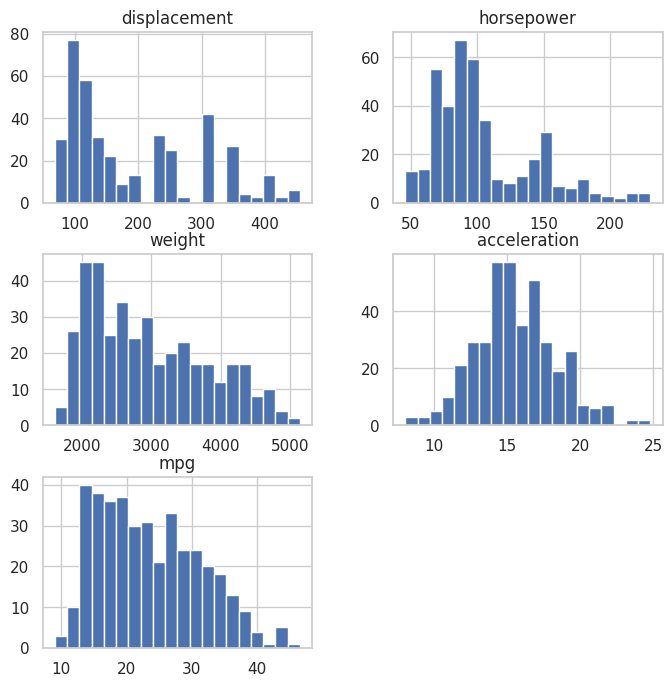

In [260]:
# Check distribution of numerical columns
cat_cols = ["cylinders", "model_year", "origin"]
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
num_cols = [col for col in num_cols if col not in cat_cols]

df[num_cols].hist(bins=20, figsize=(8, 8))

Unique values in cylinders: [8 4 6 3 5]
Unique values in model_year: [70 71 72 73 74 75 76 77 78 79 80 81 82]
Unique values in origin: [1 3 2]


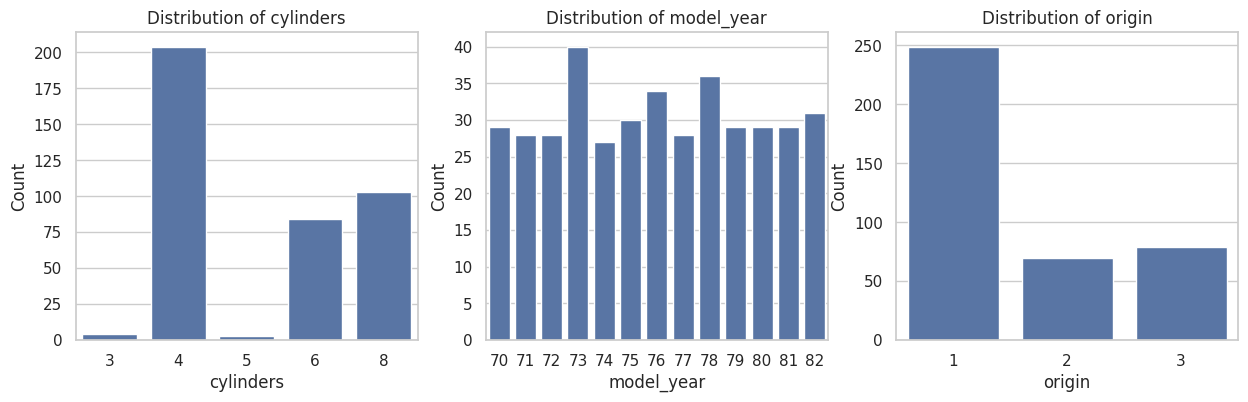

In [261]:
# Check unique values in categorical columns
for col in cat_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

# Check distributin of unque values in categorical columns
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axs[i])
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Count")

### 2.4. Multivariate analysis

Explore interactions among multiple features

<Axes: >

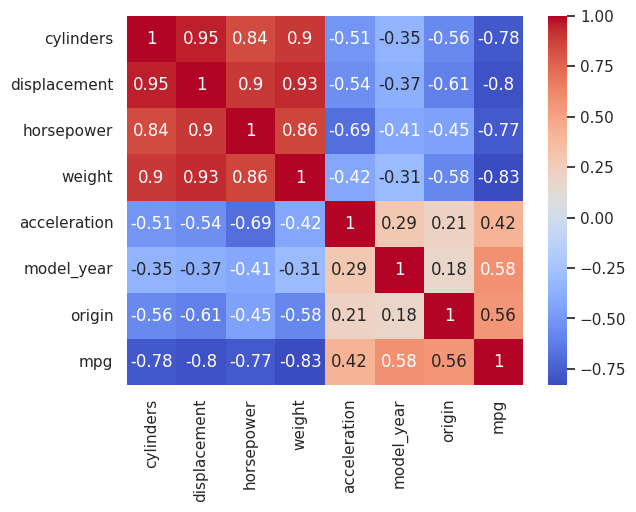

In [262]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [263]:
# cylinders	displacement	horsepower	weight	acceleration	model_year	origin

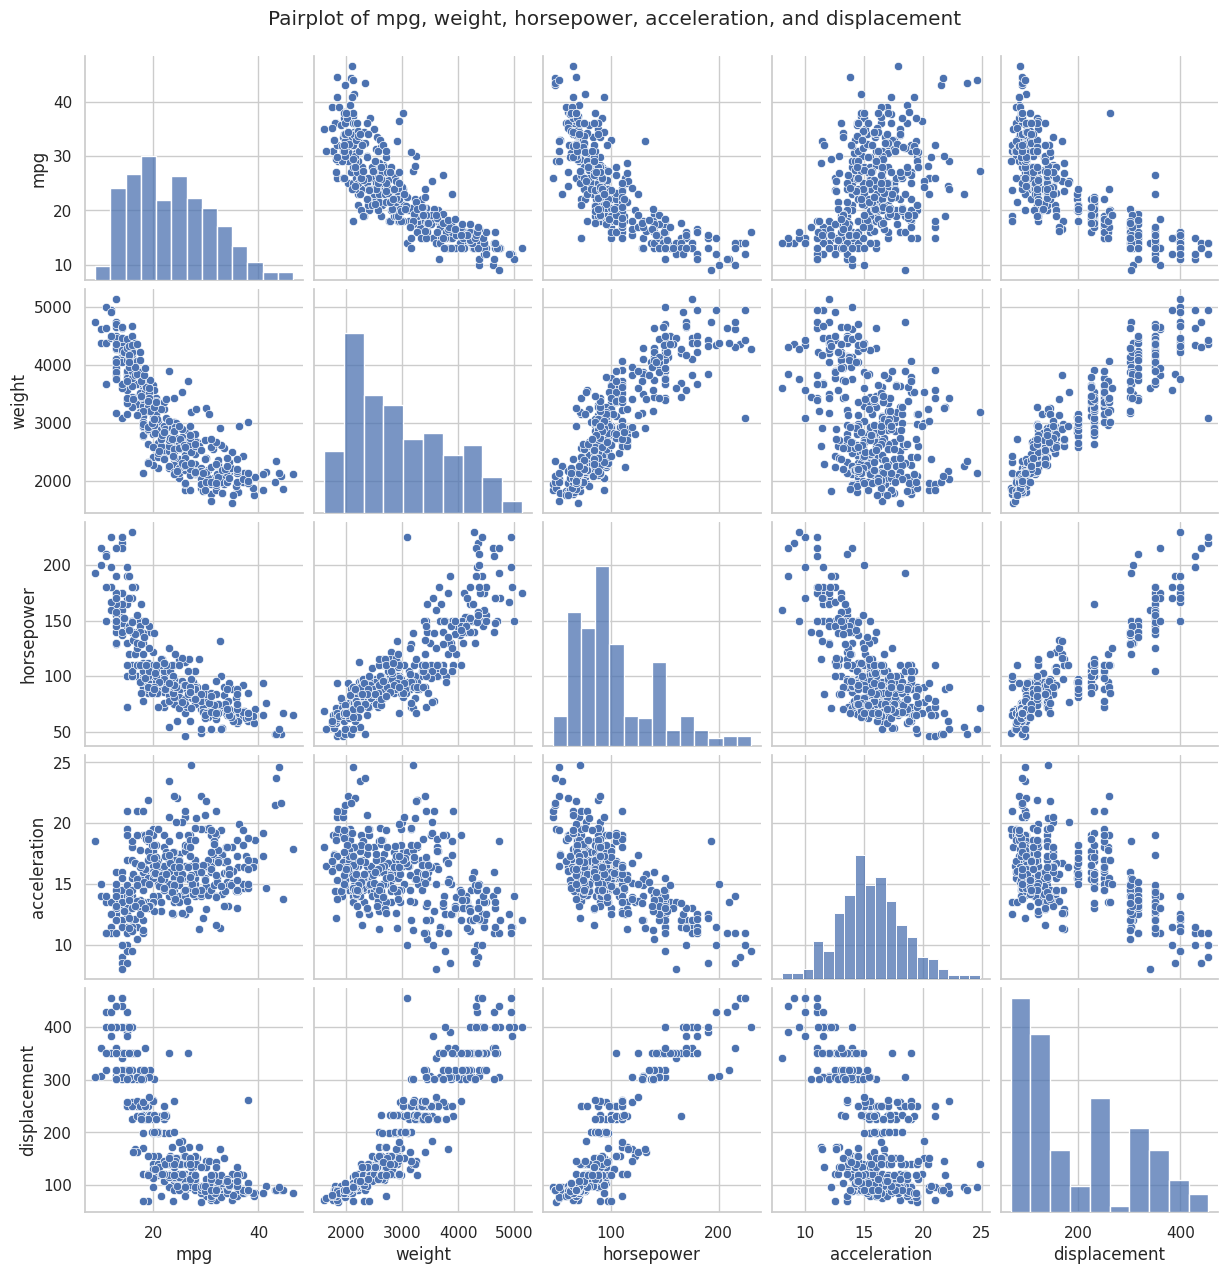

In [264]:
# (a) Pairplot of selected features
cols_pair = ["mpg", "weight", "horsepower", "acceleration", "displacement"]
sns.pairplot(df[cols_pair].dropna(), diag_kind="hist")
plt.suptitle(
    "Pairplot of mpg, weight, horsepower, acceleration, and displacement", y=1.02
)
plt.show()

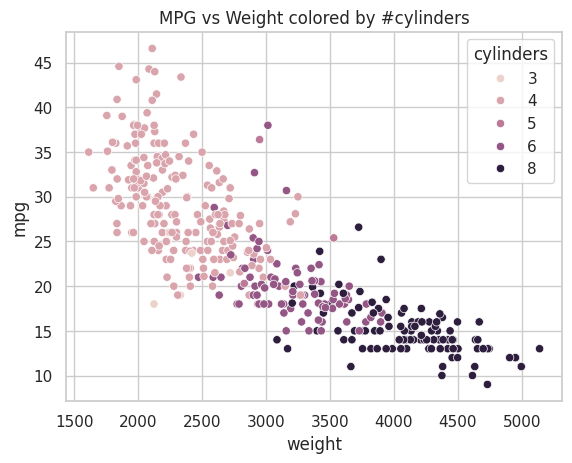

In [265]:
# (b) Scatter: mpg vs weight, colored by cylinders
sns.scatterplot(
    data=df,
    x="weight",
    y="mpg",
    hue="cylinders",
)
plt.title("MPG vs Weight colored by #cylinders")
plt.show()

## 3. Feature engineering

In [266]:
# TODO: Select features, make all features numeric and normalize values to the same range if necessary
X = df[["weight", "model_year", "origin", "acceleration"]]
y = df["mpg"]
X, y

(     weight  model_year  origin  acceleration
 0      3504          70       1          12.0
 1      3693          70       1          11.5
 2      3436          70       1          11.0
 3      3433          70       1          12.0
 4      3449          70       1          10.5
 ..      ...         ...     ...           ...
 393    2790          82       1          15.6
 394    2130          82       2          24.6
 395    2295          82       1          11.6
 396    2625          82       1          18.6
 397    2720          82       1          19.4
 
 [398 rows x 4 columns],
 0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
        ... 
 393    27.0
 394    44.0
 395    32.0
 396    28.0
 397    31.0
 Name: mpg, Length: 398, dtype: float64)

In [267]:
from sklearn.preprocessing import StandardScaler

In [268]:
scaler = StandardScaler()

In [269]:
X_scaled = scaler.fit_transform(X)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [271]:
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


## 4. Model training

In [272]:
# TODO: Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=52
)

In [273]:
# TODO: Create a LinerRegression model instance from sklearn and fit the model
from sklearn.linear_model import LinearRegression

In [274]:
model = LinearRegression()

In [275]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 5. Evaluatation

In [276]:
# TODO: Predicting on the test set using the fitted model
y_pred = model.predict(X_test)

In [277]:
# TODO: Calculate evaluation metrics (MAE, MSE, RMSE, R2)
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
)

In [278]:
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.3f}")
print(f"R: {r2_score(y_test, y_pred):.3f}")

MAE: 2.592
MSE: 13.387
RMSE: 3.659
R: 0.784
